Mean accuracy of AdaBoost with Decision Tree Classifier (cross-validation): 78.37%
Standard deviation of accuracy of AdaBoost with Decision Tree Classifier (cross-validation): 0.88%
The shape of labels is: (6955,)
First 10 predictions: [1 4 5 2 5 5 5 5 1 3]
First 10 probabilities:
[[0.207 0.196 0.206 0.193 0.198]
 [0.188 0.205 0.19  0.215 0.202]
 [0.19  0.205 0.195 0.199 0.211]
 [0.195 0.204 0.198 0.199 0.204]
 [0.197 0.196 0.199 0.201 0.206]
 [0.189 0.2   0.19  0.202 0.219]
 [0.188 0.21  0.191 0.194 0.218]
 [0.188 0.206 0.189 0.2   0.218]
 [0.218 0.194 0.203 0.19  0.195]
 [0.195 0.193 0.21  0.204 0.199]]


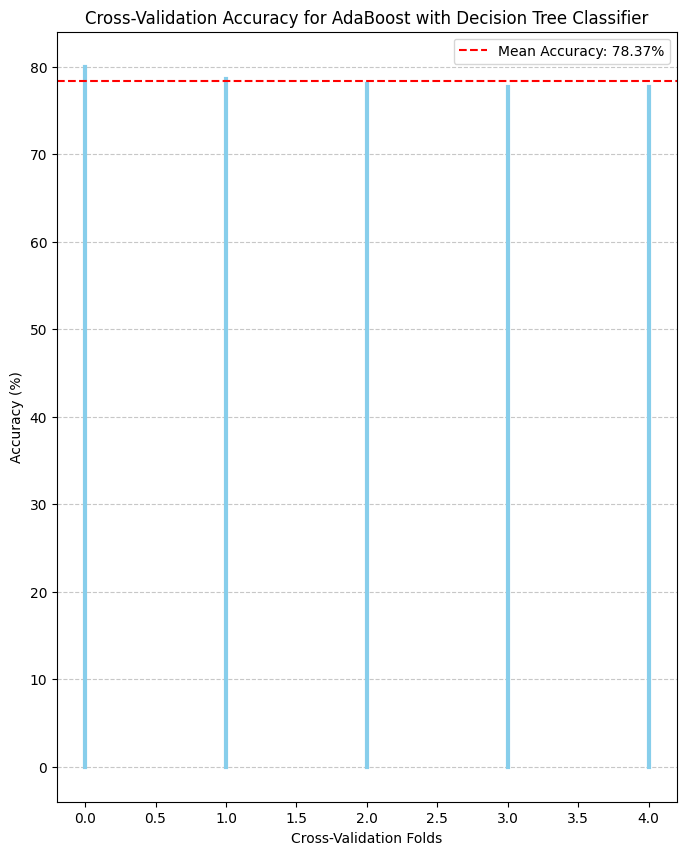

In [7]:
#----------AdaBoost with Decision Tree Classifier----------

# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# Importing datasets
datasetTV = pd.read_csv("datasetTV.csv", header=None) # Training set
datasetTest = pd.read_csv("datasetTest.csv", header=None) # Test set

# Splitting features and labels, converting the columns of the DataFrames into NumPy arrays
X = datasetTV.iloc[:, :-1].values  # All the columns except for the last one
y = datasetTV.iloc[:, -1].values   # Last column (labels)

#----------Training the model----------

# Normalizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choosing hyperparameters in order to find the best combination that makes the classifier more effective (accurate)
#param_grid = {
#    'max_depth': [5, 10, 15, None],
#    'min_samples_split': [2, 10, 20],
#    'min_samples_leaf': [1, 2, 4]
#}

#grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, scoring='accuracy')
#grid_search.fit(X, y)

#print("Best hyperparameters for Decision Tree Classifier:", grid_search.best_params_)
#Result: Best hyperparameters for Decision Tree Classifier: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 20}

# Selecting the base estimator, a Decision Tree with the best hyperparameters
base_estimator = DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=20, random_state=42)

# Initializing AdaBoost with the customized Decision Tree
classifier = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)

# Training the model
classifier.fit(X_scaled, y)

# Performing Cross-Validation with 5 folds
cv_scores = cross_val_score(classifier, X_scaled, y, cv=5)

# Displaying mean accuracy and standard deviation
print(f"Mean accuracy of AdaBoost with Decision Tree Classifier (cross-validation): {np.mean(cv_scores) * 100:.2f}%")
print(f"Standard deviation of accuracy of AdaBoost with Decision Tree Classifier (cross-validation): {np.std(cv_scores) * 100:.2f}%")

# ----------Model Testing----------

# Normalizing the test dataset
X_test_scaled = scaler.transform(datasetTest.values)  # Applying the same scaling as the training data

# Making predictions on the test set
labels = classifier.predict(X_test_scaled)
labels_proba = classifier.predict_proba(X_test_scaled)

# Saving predictions and probabilities
np.save('labels.npy', labels)

# Checking the saved file
loaded_labels = np.load('labels.npy')

print("The shape of labels is:", loaded_labels.shape)  # It should be (6955,)
print("First 10 predictions:", loaded_labels[:10])  # Displaying the first 10 predictions
print("First 10 probabilities:")
print(np.round(labels_proba[:10], 3))  # Displaying probabilities for the first 10 predictions

#----------Visualization of the mean accuracy----------

# Importing libraries for visualization
import matplotlib.pyplot as plt

#----------Visualization of the mean accuracy----------

# Creating the diagram
plt.figure(figsize=(8, 10))

# Plotting each fold accuracy & the mean accuracy
for i, score in enumerate(cv_scores):
    plt.plot([i, i], [0, score * 100], color='skyblue', lw=3)  # vertical line for each fold accuracy

mean_accuracy = np.mean(cv_scores)
plt.axhline(y=mean_accuracy * 100, color='red', linestyle='--', label=f'Mean Accuracy: {mean_accuracy * 100:.2f}%')

# Regulating the diagram
plt.title("Cross-Validation Accuracy for AdaBoost with Decision Tree Classifier")
plt.ylabel("Accuracy (%)")
plt.xlabel("Cross-Validation Folds")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the mean accuracy & diagram
plt.legend()
plt.show()

In [ ]:
#----------Gaussian Naive Bayes Classifier----------

# Importing libraries
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

# Importing datasets
datasetTV = pd.read_csv("datasetTV.csv", header=None) # Training set
datasetTest = pd.read_csv("datasetTest.csv", header=None) # Test set

# Splitting features and labels, converting the columns of the DataFrames into NumPy arrays
X = datasetTV.iloc[:, :-1].values  # All the columns except for the last one
y = datasetTV.iloc[:, -1].values   # Last column (labels)

#----------Training the model----------

# Normalizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Creating and training the Gaussian Naive Bayes model
classifier = GaussianNB()
classifier.fit(X_scaled, y)  # Training the model

# Performing Cross-Validation with 5 folds
cv_scores = cross_val_score(classifier, X_scaled, y, cv=5)

# Displaying mean accuracy and standard deviation
print(f"Mean accuracy of Gaussian Naive Bayes (cross-validation): {np.mean(cv_scores) * 100:.2f}%")
print(f"Standard deviation of accuracy of Gaussian Naive Bayes (cross-validation): {np.std(cv_scores) * 100:.2f}%")

# ----------Model Testing----------
# Normalizing the dataset
X_test_scaled = scaler.transform(datasetTest.values)

# Making predictions on the test set
labels = classifier.predict(datasetTest)
labels_proba = classifier.predict_proba(datasetTest)

# Saving predictions and probabilities
np.save('labels.npy', labels)

# Checking the saved file
loaded_labels = np.load('labels.npy')

print("The shape of labels is:", loaded_labels.shape)  # It should be (6955,)
print("First 10 predictions:", loaded_labels[:10])  # Displaying the first 10 predictions
print("First 10 probabilities:")
print(np.round(labels_proba[:10], 3))  # Displaying probabilities for the first 10 predictions

#----------Visualization of the mean accuracy----------

# Creating the diagram
plt.figure(figsize=(8, 10))

# Plotting each fold accuracy & the mean accuracy
for i, score in enumerate(cv_scores):
    plt.plot([i, i], [0, score * 100], color='skyblue', lw=3)  # vertical line for each fold score

mean_accuracy = np.mean(cv_scores)
plt.axhline(y=mean_accuracy * 100, color='red', linestyle='--', label=f'Mean Accuracy: {mean_accuracy * 100:.2f}%')

# Regulating the diagram
plt.title("Cross-Validation Accuracy for Gaussian Naive Bayes Classifier")
plt.ylabel("Accuracy (%)")
plt.xlabel("Cross-Validation Folds")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the mean accuracy & diagram
plt.legend()
plt.show()

Mean accuracy of Gaussian Naive Bayes (cross-validation): 70.26%
Standard deviation of accuracy of Gaussian Naive Bayes (cross-validation): 1.14%
The shape of labels is: (6955,)
First 10 predictions: [3 2 5 2 2 5 5 5 2 2]
First 10 probabilities:
[[0.    0.001 0.999 0.    0.   ]
 [0.    0.764 0.    0.    0.236]
 [0.    0.056 0.    0.    0.944]
 [0.    0.993 0.    0.    0.007]
 [0.    0.863 0.    0.    0.137]
 [0.    0.106 0.    0.058 0.836]
 [0.    0.189 0.    0.    0.811]
 [0.    0.013 0.    0.    0.987]
 [0.445 0.459 0.096 0.    0.   ]
 [0.    0.978 0.014 0.    0.008]]


NameError: name 'plt' is not defined

In [5]:
#----------Random Forest with GridSearch----------

# Importing libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Importing datasets
datasetTV = pd.read_csv("datasetTV.csv", header=None) # Training set
datasetTest = pd.read_csv("datasetTest.csv", header=None) # Test set

# Splitting features and labels, converting the columns of the DataFrames into NumPy arrays
X = datasetTV.iloc[:, :-1].values  # All the columns except for the last one
y = datasetTV.iloc[:, -1].values   # Last column (labels)

#----------Training the model----------

# Creating and training the Random Forest model with GridSearchCV for hyperparameter optimization
param_grid = {
    'n_estimators': [600], # using only one value to save time, in previous attempts it was proved n_estimators=600 was the most effective option
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2],
    'max_depth': [None, 50, 100]
}

# Normalizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_scaled, y)

# Displaying the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
clf_best = grid_search.best_estimator_

# Performing Cross-Validation to evaluate the model with 5 folds
cv_scores = cross_val_score(clf_best, X_scaled, y, cv=5)
print(f"Mean accuracy of Random Forest (Cross-Validation): {np.mean(cv_scores) * 100:.2f}%")
print(f"Standard deviation of Random Forest (Cross-Validation): {np.std(cv_scores) * 100:.2f}%")

# ----------Model Testing----------

# Normalizing the test dataset
X_test_scaled = scaler.transform(datasetTest.values)  # Applying the same scaling as the training data

# Making predictions on the test set
labels = clf_best.predict(X_test_scaled)
labels_proba = clf_best.predict_proba(X_test_scaled)

# Saving predictions and probabilities
np.save('labels.npy', labels)

# Checking the saved file
loaded_labels = np.load('labels.npy')

print("The shape of labels is:", labels.shape)  # It should be (6955,)
print("First 10 predictions:", labels[:10])  # Displaying the first 10 predictions
print("First 10 probabilities:")
print(np.round(labels_proba[:10], 3))  # Displaying probabilities for the first 10 predictions

#----------Visualization of the mean accuracy----------

# Creating the diagram
plt.figure(figsize=(8, 10))

# Plotting each fold accuracy & the mean accuracy
for i, score in enumerate(cv_scores):
    plt.plot([i, i], [0, score * 100], color='skyblue', lw=3)  # vertical line for each fold score

mean_accuracy = np.mean(cv_scores)
plt.axhline(y=mean_accuracy * 100, color='red', linestyle='--', label=f'Mean Accuracy: {mean_accuracy * 100:.2f}%')

# Regulating the diagram
plt.title("Cross-Validation Accuracy for Random Forest Classifier")
plt.ylabel("Accuracy (%)")
plt.xlabel("Cross-Validation Folds")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the mean accuracy & diagram
plt.legend()
plt.show()

KeyboardInterrupt: 

Mean accuracy of MLP (cross-validation): 82.74%
Standard deviation of accuracy of MLP (cross-validation): 1.03%
The shape of labels16 is: (6955,)
First 10 predictions: [1 4 2 2 2 4 2 5 1 3]
First 10 probabilities:
[[0.993 0.    0.007 0.    0.   ]
 [0.    0.    0.    1.    0.   ]
 [0.    0.588 0.    0.    0.412]
 [0.    0.534 0.    0.    0.466]
 [0.    0.997 0.    0.    0.003]
 [0.    0.    0.    0.999 0.   ]
 [0.    0.798 0.    0.    0.202]
 [0.    0.129 0.    0.19  0.681]
 [1.    0.    0.    0.    0.   ]
 [0.    0.237 0.76  0.001 0.002]]


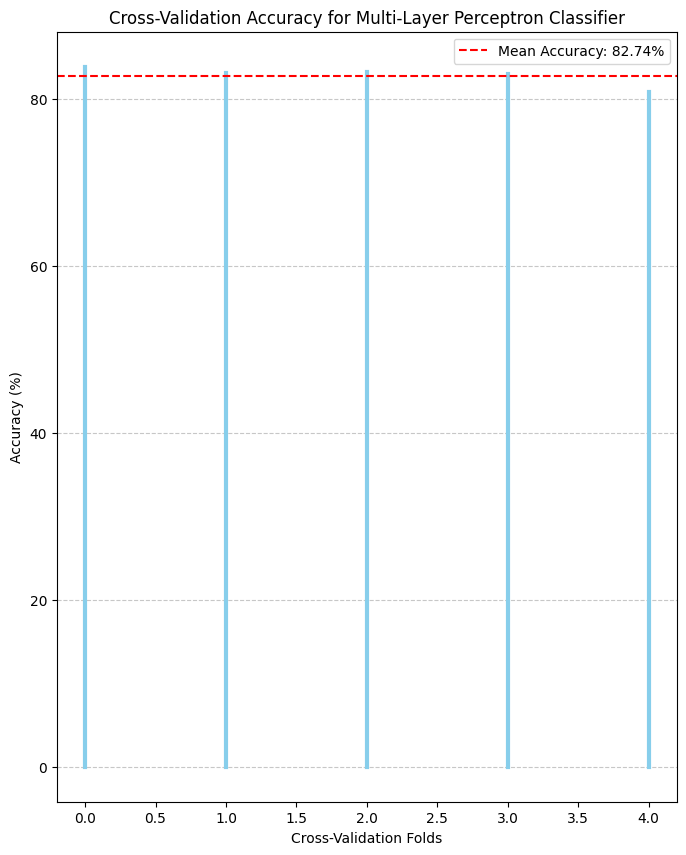

In [ ]:
#----------MLP (Multi-Layer Perceptron)----------

# Importing libraries
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier

# Importing datasets
datasetTV = pd.read_csv("datasetTV.csv", header=None) # Training set
datasetTest = pd.read_csv("datasetTest.csv", header=None) # Test set

# Splitting features and labels, converting the columns of the DataFrames into NumPy arrays
X = datasetTV.iloc[:, :-1].values  # All the columns except for the last one
y = datasetTV.iloc[:, -1].values   # Last column (labels)

#----------Training the model----------

# Normalizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Creating and training the MLP classifier
classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
classifier.fit(X_scaled, y)  # Training the model

# Performing Cross-Validation with 5 folds
cv_scores = cross_val_score(classifier, X_scaled, y, cv=5)

# Displaying mean accuracy and standard deviation
print(f"Mean accuracy of MLP (cross-validation): {np.mean(cv_scores) * 100:.2f}%")
print(f"Standard deviation of accuracy of MLP (cross-validation): {np.std(cv_scores) * 100:.2f}%")

# ----------Model Testing----------

# Normalizing the test dataset
X_test_scaled = scaler.transform(datasetTest.values)  # Applying the same scaling as the training data

# Making predictions on the test set
labels = classifier.predict(X_test_scaled)
labels_proba = classifier.predict_proba(X_test_scaled)

# Saving predictions and probabilities
np.save('labels.npy', labels)

# Checking the saved file
loaded_labels = np.load('labels.npy')

print("The shape of labels is:", labels.shape)  # It should be (6955,)
print("First 10 predictions:", labels[:10])  # Displaying the first 10 predictions
print("First 10 probabilities:")
print(np.round(labels_proba[:10], 3))  # Displaying probabilities for the first 10 predictions

#----------Visualization of the mean accuracy----------

# Creating the diagram
plt.figure(figsize=(8, 10))

# Plotting each fold accuracy & the mean accuracy
for i, score in enumerate(cv_scores):
    plt.plot([i, i], [0, score * 100], color='skyblue', lw=3)  # vertical line for each fold score

mean_accuracy = np.mean(cv_scores)
plt.axhline(y=mean_accuracy * 100, color='red', linestyle='--', label=f'Mean Accuracy: {mean_accuracy * 100:.2f}%')

# Regulating the diagram
plt.title("Cross-Validation Accuracy for Multi-Layer Perceptron Classifier")
plt.ylabel("Accuracy (%)")
plt.xlabel("Cross-Validation Folds")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the mean accuracy & diagram
plt.legend()
plt.show()

7. Mean accuracy of SVM with RBF Kernel & GridSearch (cross-validation): 84.56%
7. Standard deviation of accuracy of SVM with RBF Kernel & GridSearch (cross-validation): 1.10%
7. The shape of labels16 is: (6955,)
7. First 10 predictions: [1 4 5 2 2 4 5 5 1 3]
7. First 10 probabilities:
[[0.777 0.002 0.218 0.003 0.001]
 [0.    0.032 0.001 0.927 0.04 ]
 [0.001 0.348 0.001 0.032 0.618]
 [0.003 0.654 0.005 0.002 0.336]
 [0.002 0.56  0.001 0.003 0.435]
 [0.001 0.066 0.001 0.733 0.2  ]
 [0.    0.25  0.    0.004 0.746]
 [0.    0.345 0.001 0.028 0.626]
 [0.978 0.006 0.004 0.001 0.011]
 [0.    0.077 0.879 0.015 0.028]]


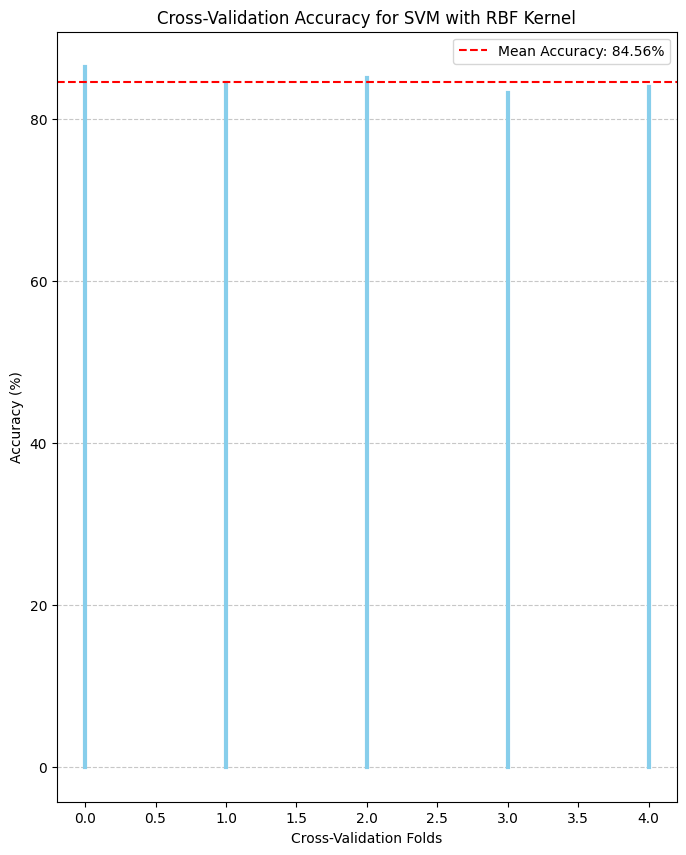

In [ ]:
#----------SVM with RBF Kernel & GridSearch----------

# Importing libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

# Importing datasets
datasetTV = pd.read_csv("datasetTV.csv", header=None)  # Training set
datasetTest = pd.read_csv("datasetTest.csv", header=None)  # Test set

# Splitting features and labels, converting the columns of the DataFrames into NumPy arrays
X = datasetTV.iloc[:, :-1].values  # All the columns except for the last one
y = datasetTV.iloc[:, -1].values   # Last column (labels)

#----------Training the model----------

# Normalizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define hyperparameters to tune
#param_grid = {
#    'C': [0.1, 1, 10, 100],  # Regularization parameter
#    'gamma': [0.001, 0.01, 0.1, 1],  # Kernel coefficient
#    'kernel': ['rbf'],  # You can add other kernel types for comparison (e.g., 'linear', 'poly')
#}
# Setting up GridSearchCV
#grid_search = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=5, n_jobs=-1, scoring='accuracy')
#grid_search.fit(X_scaled, y)

# Best hyperparameters
#print("7. Best hyperparameters:", grid_search.best_params_)

# Get the best model from grid search
#classifier = grid_search.best_estimator_

# Using best hyperparameters
best_params = {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
classifier = SVC(**best_params, probability=True, random_state=42)
classifier.fit(X_scaled, y)

# Perform cross-validation to evaluate the model
cv_scores = cross_val_score(classifier, X_scaled, y, cv=5)
print(f"Mean accuracy of SVM with RBF Kernel & GridSearch (cross-validation): {np.mean(cv_scores) * 100:.2f}%")
print(f"Standard deviation of accuracy of SVM with RBF Kernel & GridSearch (cross-validation): {np.std(cv_scores) * 100:.2f}%")

# ----------Model Testing----------

# Normalizing the test dataset
X_test_scaled = scaler.transform(datasetTest.values)  # Applying the same scaling as the training data

# Making predictions on the test set
labels = classifier.predict(X_test_scaled)
labels_proba = classifier.predict_proba(X_test_scaled)

# Saving predictions and probabilities
np.save('labels.npy', labels)

# Checking the saved file
loaded_labels = np.load('labels.npy')

print("The shape of labels is:", loaded_labels.shape)  # It should be (6955,)
print("First 10 predictions:", loaded_labels[:10])  # Displaying the first 10 predictions
print("First 10 probabilities:")
print(np.round(labels_proba[:10], 3))  # Displaying probabilities for the first 10 predictions

#----------Visualization of the mean accuracy----------

# Creating the diagram
plt.figure(figsize=(8, 10))

# Plotting each fold accuracy & the mean accuracy
for i, score in enumerate(cv_scores):
    plt.plot([i, i], [0, score * 100], color='skyblue', lw=3)  # vertical line for each fold score

mean_accuracy = np.mean(cv_scores)
plt.axhline(y=mean_accuracy * 100, color='red', linestyle='--', label=f'Mean Accuracy: {mean_accuracy * 100:.2f}%')

# Regulating the diagram
plt.title("Cross-Validation Accuracy for SVM with RBF Kernel")
plt.ylabel("Accuracy (%)")
plt.xlabel("Cross-Validation Folds")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the mean accuracy & diagram
plt.legend()
plt.show()

8. Mean accuracy of SVM with PCA (cross-validation): 86.05%
8. Standard deviation of accuracy of SVM with PCA (cross-validation): 0.86%
8. The shape of labels16 is: (6955,)
8. First 10 predictions: [1 4 5 2 5 4 5 5 1 3]
8. First 10 probabilities:
[[0.957 0.002 0.038 0.001 0.001]
 [0.    0.005 0.    0.99  0.005]
 [0.001 0.224 0.001 0.075 0.699]
 [0.002 0.763 0.002 0.003 0.23 ]
 [0.002 0.415 0.002 0.01  0.572]
 [0.    0.054 0.    0.708 0.238]
 [0.    0.377 0.    0.001 0.622]
 [0.    0.422 0.    0.022 0.556]
 [0.957 0.025 0.003 0.001 0.015]
 [0.    0.022 0.974 0.001 0.003]]


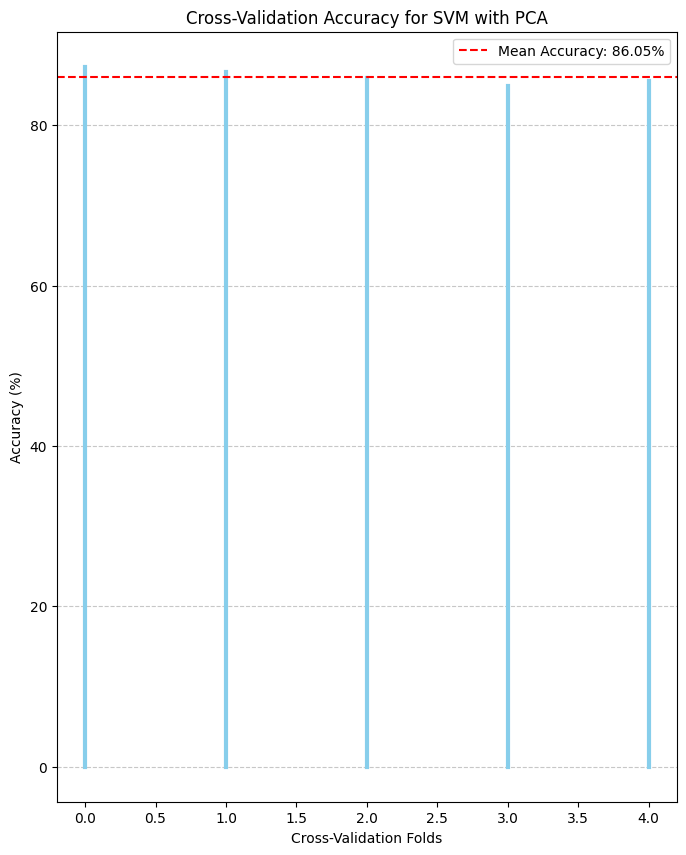

In [ ]:
#----------SVM with PCA----------

# Importing libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Importing datasets
datasetTV = pd.read_csv("datasetTV.csv", header=None)  # Training set
datasetTest = pd.read_csv("datasetTest.csv", header=None)  # Test set

# Splitting features and labels, converting the columns of the DataFrames into NumPy arrays
X = datasetTV.iloc[:, :-1].values  # All the columns except for the last one
y = datasetTV.iloc[:, -1].values   # Last column (labels)

#----------Training the model----------

# Normalizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA for dimensionality reduction
pca = PCA(n_components=0.65)  # Retain 65% of variance
X_pca = pca.fit_transform(X_scaled)

# Training the SVM model on reduced dimensions
best_params = {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
classifier = SVC(**best_params, probability=True, random_state=42)
classifier.fit(X_pca, y)

# Performing cross-validation
cv_scores = cross_val_score(classifier, X_pca, y, cv=5)
print(f"Mean accuracy of SVM with PCA (cross-validation): {np.mean(cv_scores) * 100:.2f}%")
print(f"Standard deviation of accuracy of SVM with PCA (cross-validation): {np.std(cv_scores) * 100:.2f}%")

# ----------Model Testing----------

# Normalizing and reducing dimensions of the test dataset
X_test_scaled = scaler.transform(datasetTest.values)  # Applying the same scaling as the training data
X_test_pca = pca.transform(X_test_scaled)  # Reduce dimensions using PCA

# Making predictions on the test set
labels = classifier.predict(X_test_pca)
labels_proba = classifier.predict_proba(X_test_pca)

# Saving predictions and probabilities
np.save('labels.npy', labels)

# Checking the saved file
loaded_labels = np.load('labels.npy')

print("The shape of labels is:", loaded_labels.shape)  # It should match the number of rows in the test set
print("First 10 predictions:", loaded_labels[:10])  # Displaying the first 10 predictions
print("First 10 probabilities:")
print(np.round(labels_proba[:10], 3))  # Displaying probabilities for the first 10 predictions

#----------Visualization of the mean accuracy----------

# Creating the diagram
plt.figure(figsize=(8, 10))

# Plotting each fold accuracy & the mean accuracy
for i, score in enumerate(cv_scores):
    plt.plot([i, i], [0, score * 100], color='skyblue', lw=3)  # vertical line for each fold score

mean_accuracy = np.mean(cv_scores)
plt.axhline(y=mean_accuracy * 100, color='red', linestyle='--', label=f'Mean Accuracy: {mean_accuracy * 100:.2f}%')

# Regulating the diagram
plt.title("Cross-Validation Accuracy for SVM with PCA")
plt.ylabel("Accuracy (%)")
plt.xlabel("Cross-Validation Folds")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the mean accuracy & diagram
plt.legend()
plt.show()


9. Mean accuracy of SVM with Polynomial Kernel and PCA (cross-validation): 84.18%
9. Standard deviation of accuracy of SVM with Polynomial Kernel and PCA (cross-validation): 0.89%
The shape of labels16 is: (6955,)
First 10 predictions: [1 4 5 2 2 4 2 5 1 3]
First 10 probabilities:
[[0.968 0.004 0.025 0.001 0.002]
 [0.    0.002 0.    0.994 0.004]
 [0.004 0.393 0.011 0.147 0.446]
 [0.008 0.617 0.024 0.009 0.342]
 [0.006 0.539 0.022 0.028 0.406]
 [0.    0.105 0.001 0.561 0.333]
 [0.002 0.521 0.002 0.005 0.47 ]
 [0.    0.49  0.001 0.014 0.494]
 [1.    0.    0.    0.    0.   ]
 [0.005 0.061 0.876 0.029 0.029]]


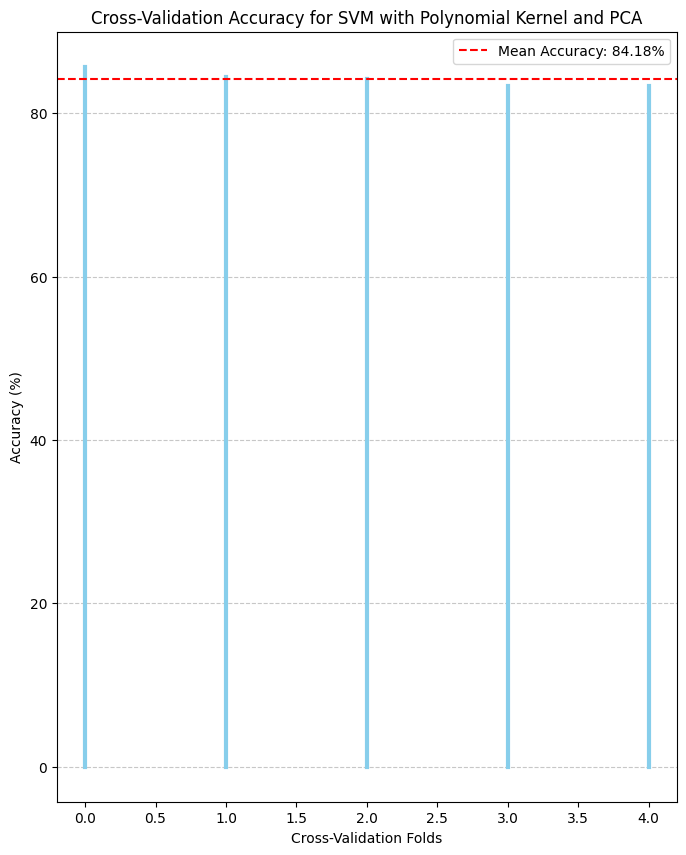

In [ ]:
#----------SVM with Polynomial Kernel and PCA----------

# Importing libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Importing datasets
datasetTV = pd.read_csv("datasetTV.csv", header=None)  # Training set
datasetTest = pd.read_csv("datasetTest.csv", header=None)  # Test set

# Splitting features and labels, converting the columns of the DataFrames into NumPy arrays
X = datasetTV.iloc[:, :-1].values  # All the columns except for the last one
y = datasetTV.iloc[:, -1].values   # Last column (labels)

# ----------Training the model----------

# Normalizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA for dimensionality reduction (retain 65% variance)
pca = PCA(n_components=0.65)
X_pca = pca.fit_transform(X_scaled)

# Defining and training the SVM with Polynomial Kernel
classifier = SVC(kernel='poly', degree=3, C=10, gamma='scale', probability=True)
classifier.fit(X_pca, y)

# Performing cross-validation
cv_scores = cross_val_score(classifier, X_pca, y, cv=5)
print(f"Mean accuracy of SVM with Polynomial Kernel and PCA (cross-validation): {np.mean(cv_scores) * 100:.2f}%")
print(f"Standard deviation of accuracy of SVM with Polynomial Kernel and PCA (cross-validation): {np.std(cv_scores) * 100:.2f}%")

# ----------Model Testing----------

# Normalizing the test dataset and applying PCA
X_test_scaled = scaler.transform(datasetTest.values)
X_test_pca = pca.transform(X_test_scaled)

# Making predictions on the test set
labels = classifier.predict(X_test_pca)
labels_proba = classifier.predict_proba(X_test_pca)

# Saving predictions and probabilities
np.save('labels.npy', labels)

# Checking the saved file
loaded_labels = np.load('labels.npy')

print("The shape of labels is:", loaded_labels.shape)  # It should match the number of test samples
print("First 10 predictions:", loaded_labels[:10])  # Displaying the first 10 predictions
print("First 10 probabilities:")
print(np.round(labels_proba[:10], 3))  # Displaying probabilities for the first 10 predictions

#----------Visualization of the mean accuracy----------

# Creating the diagram
plt.figure(figsize=(8, 10))

# Plotting each fold accuracy & the mean accuracy
for i, score in enumerate(cv_scores):
    plt.plot([i, i], [0, score * 100], color='skyblue', lw=3)  # vertical line for each fold score

mean_accuracy = np.mean(cv_scores)
plt.axhline(y=mean_accuracy * 100, color='red', linestyle='--', label=f'Mean Accuracy: {mean_accuracy * 100:.2f}%')

# Regulating the diagram
plt.title("Cross-Validation Accuracy for SVM with Polynomial Kernel and PCA")
plt.ylabel("Accuracy (%)")
plt.xlabel("Cross-Validation Folds")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the mean accuracy & diagram
plt.legend()
plt.show()


8. Mean accuracy of SVM with PCA & SMOTE (cross-validation): 86.35%
8. Standard deviation of accuracy of SVM with PCA & SMOTE (cross-validation): 0.70%
8. The shape of labels16 is: (6955,)
8. First 10 predictions: [1 4 5 2 5 4 5 5 1 3]
8. First 10 probabilities:
[[0.951 0.002 0.045 0.001 0.001]
 [0.    0.004 0.    0.991 0.004]
 [0.001 0.229 0.001 0.071 0.698]
 [0.002 0.771 0.002 0.002 0.223]
 [0.002 0.422 0.001 0.01  0.565]
 [0.    0.055 0.    0.711 0.234]
 [0.    0.38  0.    0.001 0.619]
 [0.    0.403 0.    0.022 0.575]
 [0.958 0.024 0.003 0.001 0.015]
 [0.    0.021 0.975 0.001 0.003]]


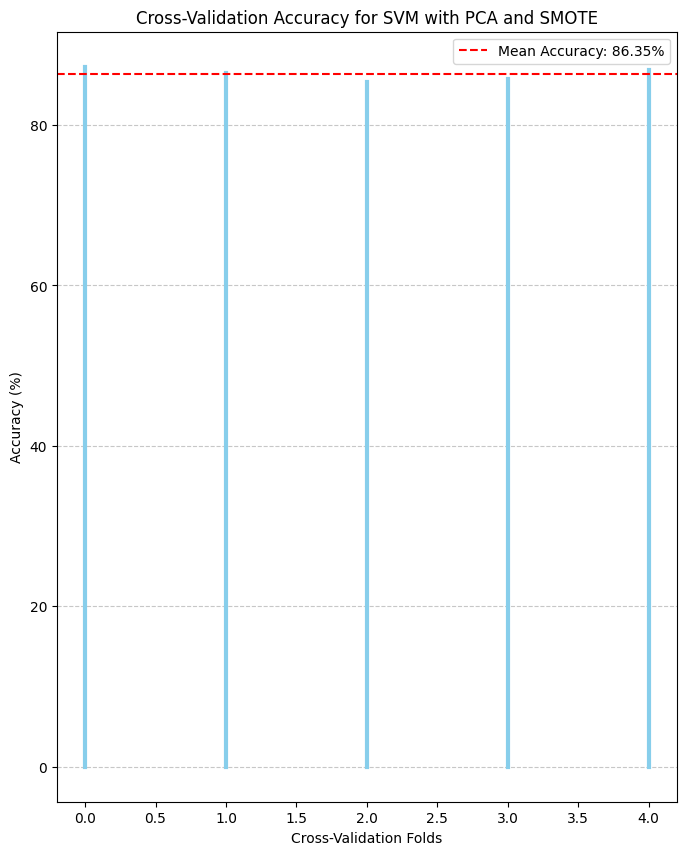

In [ ]:
#----------SVM with PCA and SMOTE----------

# Importing libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Importing datasets
datasetTV = pd.read_csv("datasetTV.csv", header=None)  # Training set
datasetTest = pd.read_csv("datasetTest.csv", header=None)  # Test set

# Splitting features and labels, converting the columns of the DataFrames into NumPy arrays
X = datasetTV.iloc[:, :-1].values  # All the columns except for the last one
y = datasetTV.iloc[:, -1].values   # Last column (labels)

#----------Balancing the dataset with SMOTE----------
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Normalizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Applying PCA for dimensionality reduction
pca = PCA(n_components=0.65)  # Retain 65% of variance
X_pca = pca.fit_transform(X_scaled)

# Training the SVM model on reduced dimensions
best_params = {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
classifier = SVC(**best_params, probability=True, random_state=42)
classifier.fit(X_pca, y_resampled)

# Performing cross-validation
cv_scores = cross_val_score(classifier, X_pca, y_resampled, cv=5)
print(f"Mean accuracy of SVM with PCA & SMOTE (cross-validation): {np.mean(cv_scores) * 100:.2f}%")
print(f"Standard deviation of accuracy of SVM with PCA & SMOTE (cross-validation): {np.std(cv_scores) * 100:.2f}%")

# ----------Model Testing----------

# Normalizing and reducing dimensions of the test dataset
X_test_scaled = scaler.transform(datasetTest.values)  # Applying the same scaling as the training data
X_test_pca = pca.transform(X_test_scaled)  # Reduce dimensions using PCA

# Making predictions on the test set
labels = classifier.predict(X_test_pca)
labels_proba = classifier.predict_proba(X_test_pca)

# Saving predictions and probabilities
np.save('labels.npy', labels)

# Checking the saved file
loaded_labels = np.load('labels.npy')

print("The shape of labels is:", loaded_labels.shape)  # It should match the number of rows in the test set
print("First 10 predictions:", loaded_labels[:10])  # Displaying the first 10 predictions
print("First 10 probabilities:")
print(np.round(labels_proba[:10], 3))  # Displaying probabilities for the first 10 predictions

#----------Visualization of the mean accuracy----------

# Creating the diagram
plt.figure(figsize=(8, 10))

# Plotting each fold accuracy & the mean accuracy
for i, score in enumerate(cv_scores):
    plt.plot([i, i], [0, score * 100], color='skyblue', lw=3)  # vertical line for each fold score

mean_accuracy = np.mean(cv_scores)
plt.axhline(y=mean_accuracy * 100, color='red', linestyle='--', label=f'Mean Accuracy: {mean_accuracy * 100:.2f}%')

# Regulating the diagram
plt.title("Cross-Validation Accuracy for SVM with PCA and SMOTE")
plt.ylabel("Accuracy (%)")
plt.xlabel("Cross-Validation Folds")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the mean accuracy & diagram
plt.legend()
plt.show()